In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("placement.csv")
data

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
data.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [5]:
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
data.columns

Index(['cgpa', 'package'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

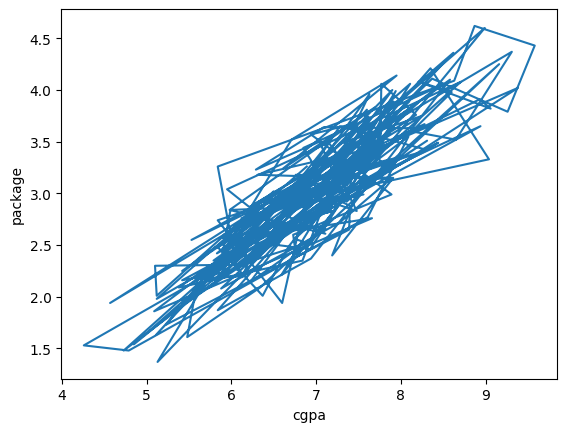

In [8]:
plt.plot(data['cgpa'],data['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show
         

C:\Users\Lab.4\AppData\Local\Temp\ipykernel_5500\2946760722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['package'])


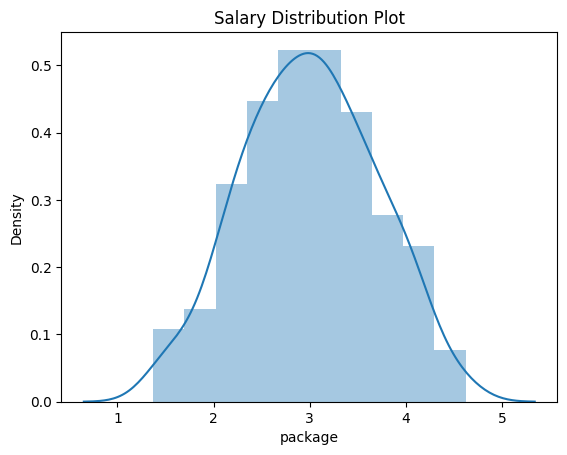

In [9]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(data['package'])
plt.show()

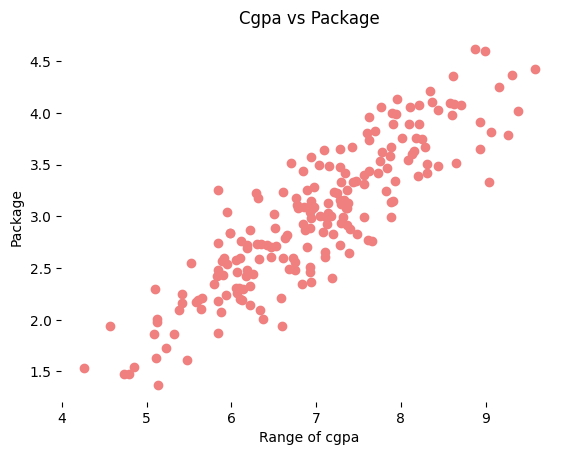

In [10]:
# Relationship between Salary and Experience
plt.scatter(data['cgpa'], data['package'], color = 'lightcoral')
plt.title('Cgpa vs Package')
plt.xlabel('Range of cgpa')
plt.ylabel('Package')
plt.box(False)
plt.show()

In [11]:
data

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [12]:
X = data['cgpa']  # independent
y = data['package'] 

In [13]:
X

0      6.89
1      5.12
2      7.82
3      7.42
4      6.94
       ... 
195    6.93
196    5.89
197    7.21
198    7.63
199    6.22
Name: cgpa, Length: 200, dtype: float64

In [14]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [15]:
# Splitting variables
X = data.iloc[:, :1]  # independent
y = data.iloc[:, 1:]  # dependent

In [16]:
!pip install -U scikit-learn

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
X_train

,cgpa
134,7.20
66,5.11
26,8.31
113,6.94
168,8.65
...,...
67,6.51
192,8.25
117,7.12
47,5.84


In [20]:
X_test.shape

(40, 1)

In [21]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

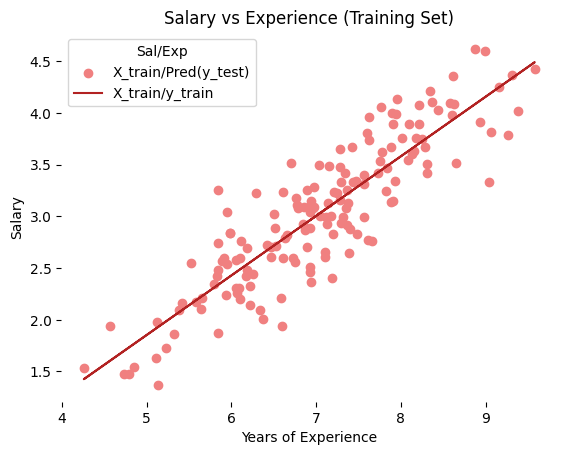

In [24]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

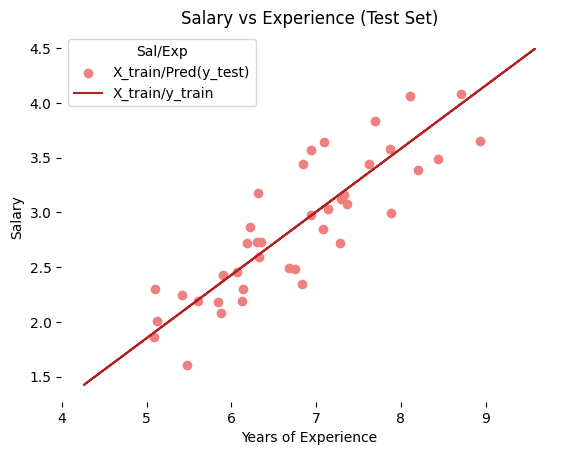

In [25]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [26]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')
print('y = ', regressor.intercept_, '+', regressor.coef_, '* X')

Coefficient: [[0.57633042]]
Intercept: [-1.02960704]
y =  [-1.02960704] + [[0.57633042]] * X


In [28]:
# evaluate the model
#RMSE=ROOT MEAN SQUARED ERROR
print('MSE = ', mean_squared_error(y_test, y_pred_test ))
print('R2 = ', r2_score(y_test, y_pred_test ))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_test )))

MSE =  0.10221131059334207
R2 =  0.7297167943957027
RMSE =  0.31970503685951224


In [31]:
regressor.predict(X_test)

array([[2.97012606],
       [2.55516816],
       [2.61856451],
       [3.40237388],
       [3.05657563],
       [2.35921582],
       [3.51763996],
       [2.4687186 ],
       [4.1227869 ],
       [3.21794814],
       [2.12868365],
       [3.19489493],
       [2.53787825],
       [3.05081232],
       [3.36779405],
       [2.86062328],
       [2.63009112],
       [2.82028015],
       [2.37074243],
       [2.91825632],
       [3.1660784 ],
       [2.3361626 ],
       [3.50611335],
       [3.9902309 ],
       [2.20360661],
       [1.90967809],
       [3.08539215],
       [2.6070379 ],
       [1.9212047 ],
       [1.90391479],
       [2.91249302],
       [3.69630239],
       [2.60127459],
       [2.09410383],
       [2.50906173],
       [3.64443265],
       [3.17184171],
       [2.97012606],
       [3.83462169],
       [2.50329842]])

In [32]:
X_test.shape

(40, 1)

In [40]:
#double square brackets[[ ]]are used to transform int/float into arrays
regressor.predict([[6.89]])

C:\Users\Lab.4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.94130954]])